# TD1  : GLM pour données de comptages

Nous n'aurons pas le temps de voir la procédure *classique* pour réaliser des boostraps sous R. Cependant de nombreuses ressources existent sur internet, et au besoin, vous pouvez par exemple consulter ces tutoriels [1](https://www.statology.org/bootstrapping-in-r/) et [2](https://bookdown.org/jgscott/DSGI/the-bootstrap.html#bootstrapping-usually-but-not-always-works).

Pour ce TD et le suivant, nous allons analyser des données provenant, de cette [étude](https://doi.org/10.1289/EHP4898), qui visait à tester et caractériser le lien entre la température ambiante et la propension au suicide.

Nous allons travailler sur une version simplifiée de leur jeu de données.

1. Chargez les données et utilisez une régression linéaire simple pour tester s'il y a un lien entre le nombre de Suicides et la température ambiante.

In [1]:
options(stringsAsFactors = F)
library(DHARMa) # fonctions : simulateResiduals, testDispersion
library(ggplot2)

ToHot = read.csv('./Data/Suicides and Ambient Temperature.csv')
head(ToHot)

This is DHARMa 0.4.6. For overview type '?DHARMa'. For recent changes, type news(package = 'DHARMa')



Country Location       Suicides Temperature
1 Brazil  Belo Horizonte 843      22.0       
2 Brazil  Brasilia       622      21.3       
3 Brazil  Campo Grande   266      25.8       
4 Brazil  Curitiba       635      17.6       
5 Brazil  Fortaleza      886      27.0       
6 Brazil  Maceio         169      24.9

Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


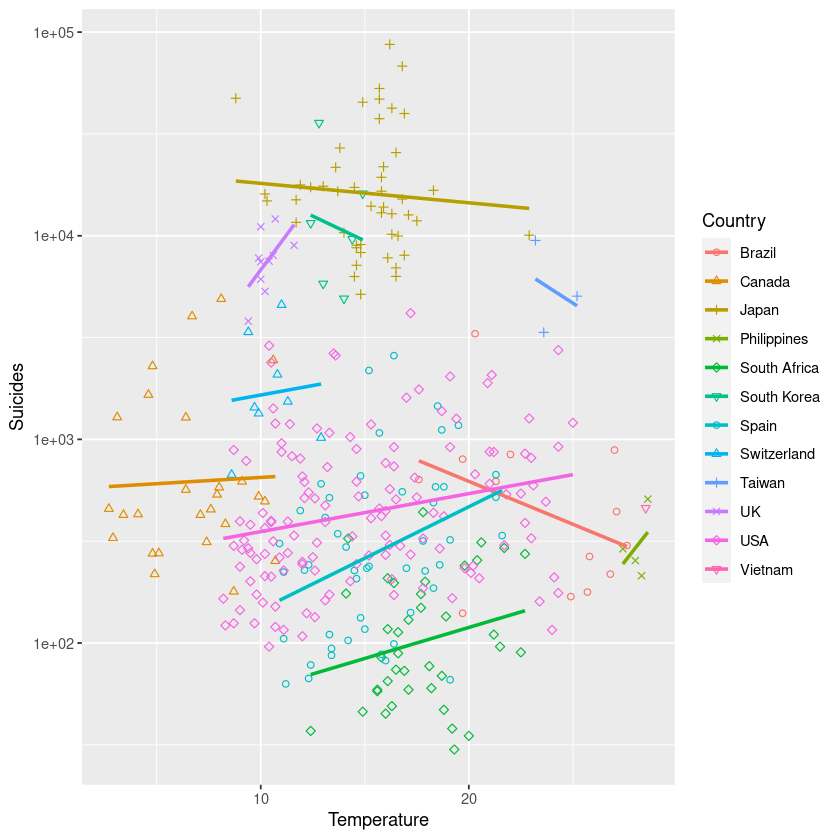

In [2]:
ylim = c(min(ToHot$Suicides), max(ToHot$Suicides))

ggplot(ToHot,aes(y = Suicides, x = Temperature, color=Country, shape=Country)) + 
  geom_point() + 
  scale_y_log10(limits = ylim) +
  scale_shape_manual(values = rep(1:6, len = 12)) +
  geom_smooth(method = "lm", fill = NA, formula = 'y ~ x')

# plot(ToHot$Suicides ~ ToHot$Temperature,col = as.numeric(as.factor(ToHot$Country)), log="y", pch=19)

Pour certains pays, la tendance *semble* un peu quadratique (canada, USA). Pour l'étudier, on va créer une variable, `Temperature2` contenant le carré des températures :

Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in qt((1 - level)/2, df):
“NaNs produced”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


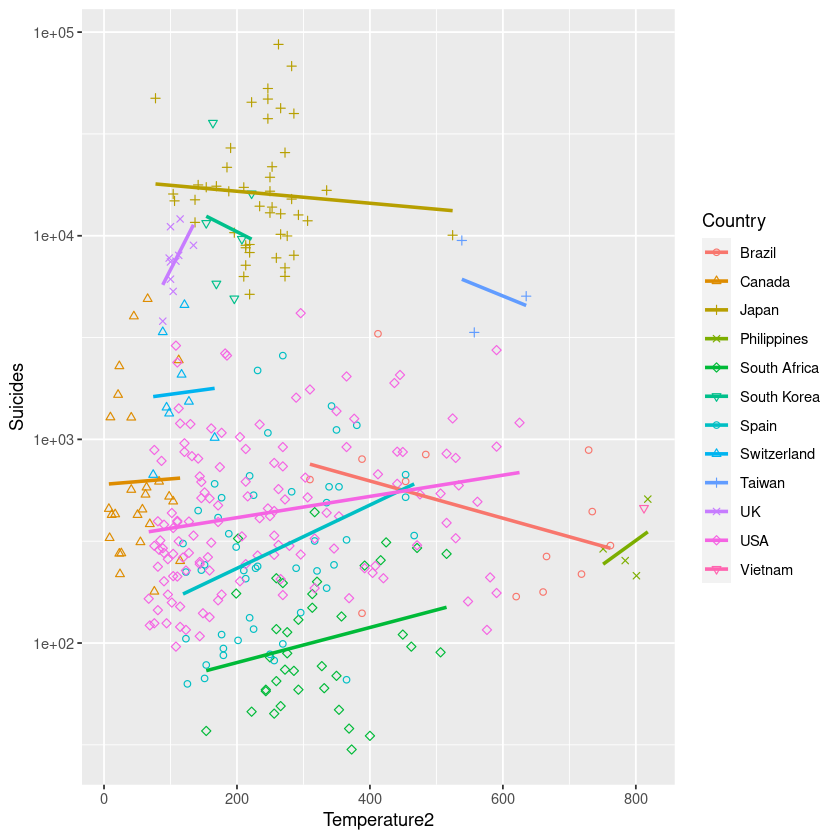

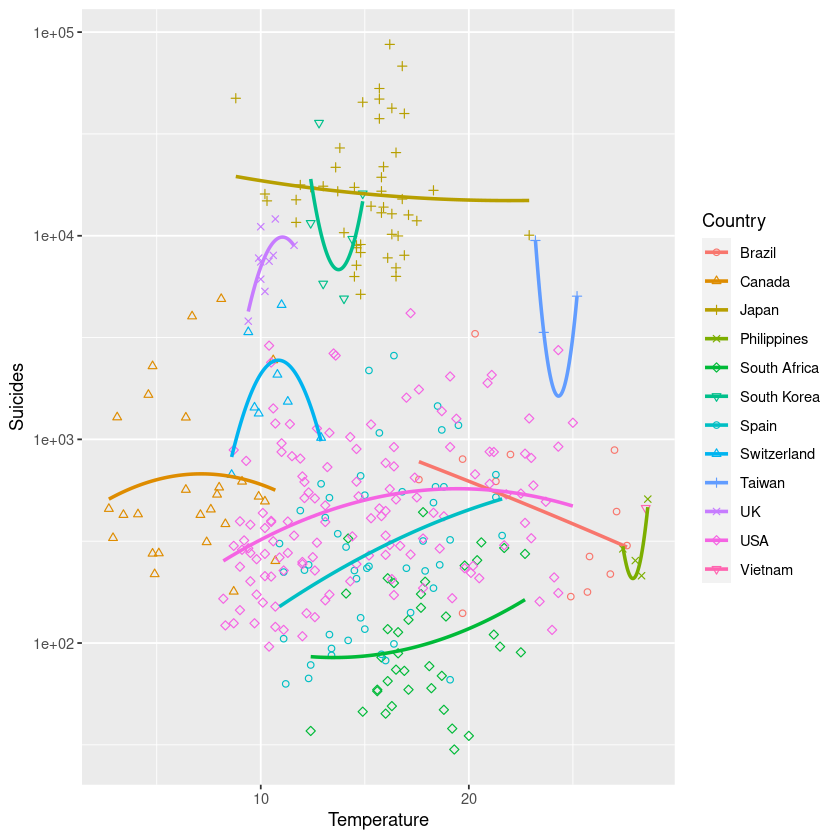

In [3]:
ToHot$Temperature2 = ToHot$Temperature^2

ggplot(ToHot,aes(y = Suicides, x = Temperature2, color=Country, shape=Country)) + 
  geom_point() + 
  scale_y_log10(limits = ylim) +
  scale_shape_manual(values = rep(1:6, len = 12)) +
  geom_smooth(method = "lm", fill = NA, formula = 'y ~ x')
# plot(ToHot$Suicides ~ ToHot$Temperature2,col = as.numeric(as.factor(ToHot$Country)), log="y", pch=19)

ggplot(ToHot,aes(y = Suicides, x = Temperature, color=Country, shape=Country)) + 
  geom_point() + 
  scale_y_log10(limits = ylim) +
  scale_shape_manual(values = rep(1:6, len = 12)) +
  geom_smooth(method = "lm", fill = NA, formula = 'y ~ x + I(x^2)')


 2a) Utilisez la variable `Temperature` pour ajuster un modèle linéaire simple à la variable `Suicides` $-$ qu'il faudra éventuellement transformer. </br>
 2b) Utilisez les variables `Temperature` et `Temperature2` pour ajuster un modèle linéaire quadratique à la variable `Suicides` $-$ qu'il faudra éventuellement transformer.

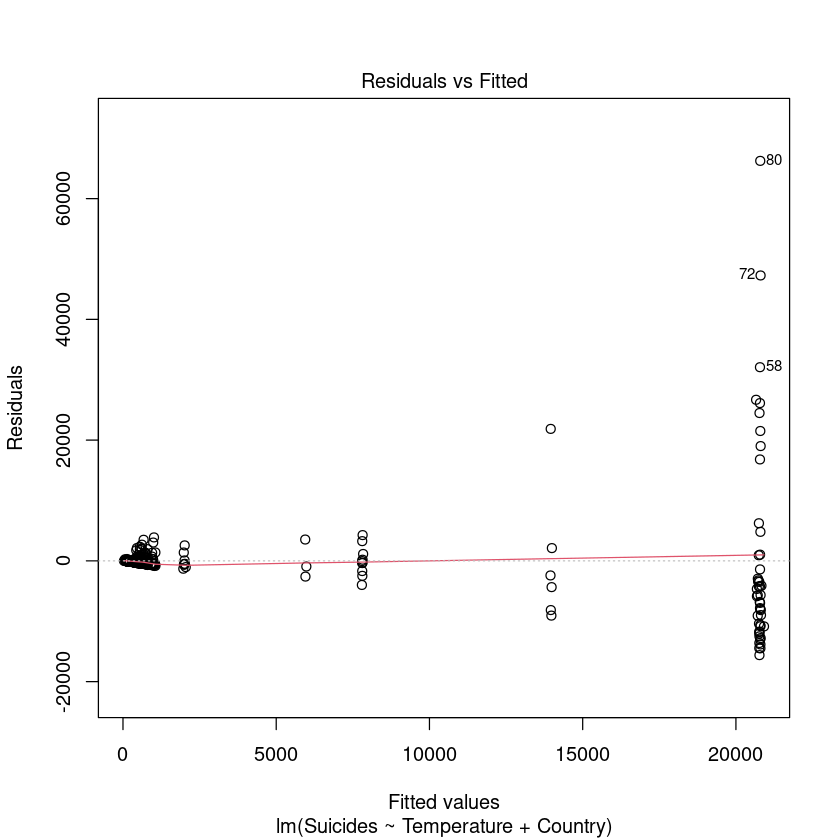

In [4]:
# 2. a) 
Mnorm  = lm(Suicides ~ Temperature + Country
            ,data = ToHot)
#qqnorm(resid(Mnorm)) ; qqline(resid(Mnorm))
plot(Mnorm ,1)
plot( simulateResiduals(Mnorm) )

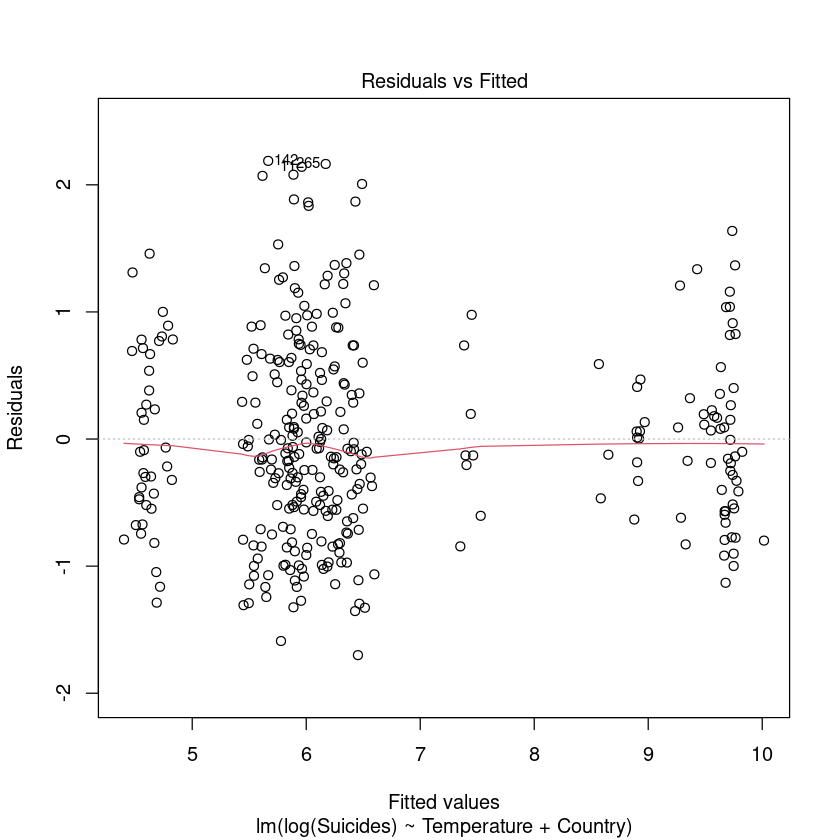

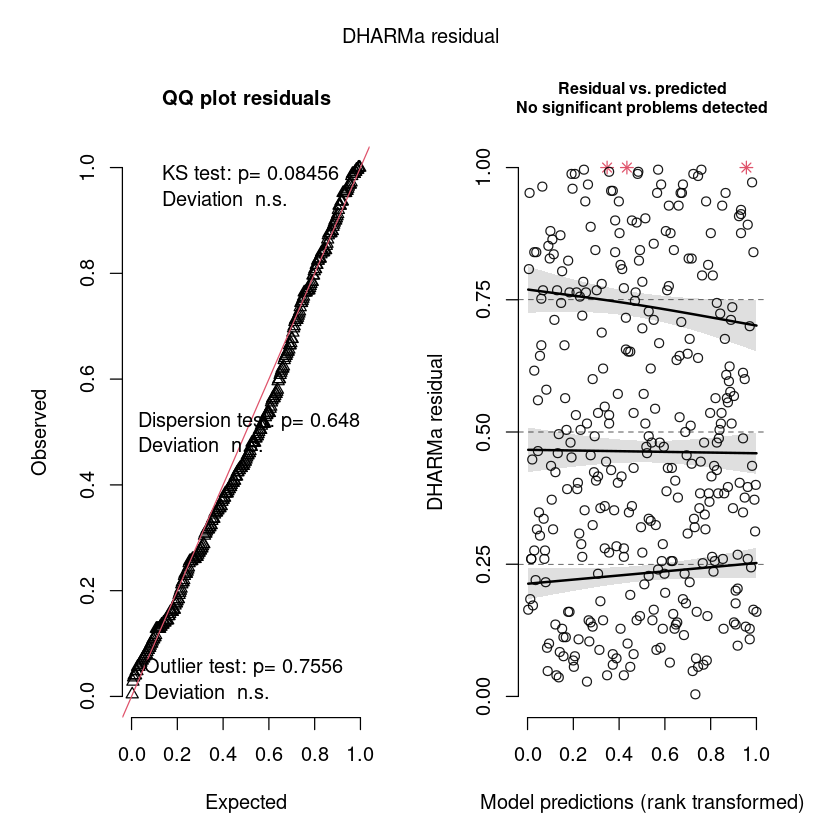

In [5]:
# 2. a) 
# Testons un modèle log normal :
Mlognorm  = lm(log(Suicides) ~ Temperature + Country
            ,data = ToHot)
plot(Mlognorm ,1)
plot( simulateResiduals(Mlognorm) )

In [6]:
# 2. a) 
anova(Mlognorm)
print(anova(Mlognorm))

Df  Sum Sq     Mean Sq   F value   Pr(>F)       
Temperature   1   6.187485  6.187485   9.89192  1.811974e-03
Country      11 807.778430 73.434403 117.39944 1.289968e-106
Residuals   328 205.166943  0.625509        NA            NA

Analysis of Variance Table

Response: log(Suicides)
             Df Sum Sq Mean Sq  F value    Pr(>F)    
Temperature   1   6.19   6.187   9.8919  0.001812 ** 
Country      11 807.78  73.434 117.3994 < 2.2e-16 ***
Residuals   328 205.17   0.626                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
# 2. a) 
cbind(coef(Mlognorm))
unique(ToHot$Country)
length(unique(ToHot$Country))

## Pour plus tard <a id='later'></a>

In [28]:
# later
formula(Mlognorm)
# print(anova(lm(Suicides ~ Country + Temperature , data = ToHot)))

# lm(Suicides ~ Country * Temperature , data = ToHot)
# lm(Suicides ~ Country + Temperature + Country:Temperature , data = ToHot)


library(car)
print(Anova(Mlognorm))
# later

# back to 
# Terms added sequentially (first to last)

log(Suicides) ~ Temperature + Country

Anova Table (Type II tests)

Response: log(Suicides)
            Sum Sq  Df F value    Pr(>F)    
Temperature   7.15   1  11.431 0.0008096 ***
Country     807.78  11 117.399 < 2.2e-16 ***
Residuals   205.17 328                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[go to 'Terms added sequentially'](#Terms_added_sequentially)
## FIN de $-$ Pour plus tard <a id='later'></a>

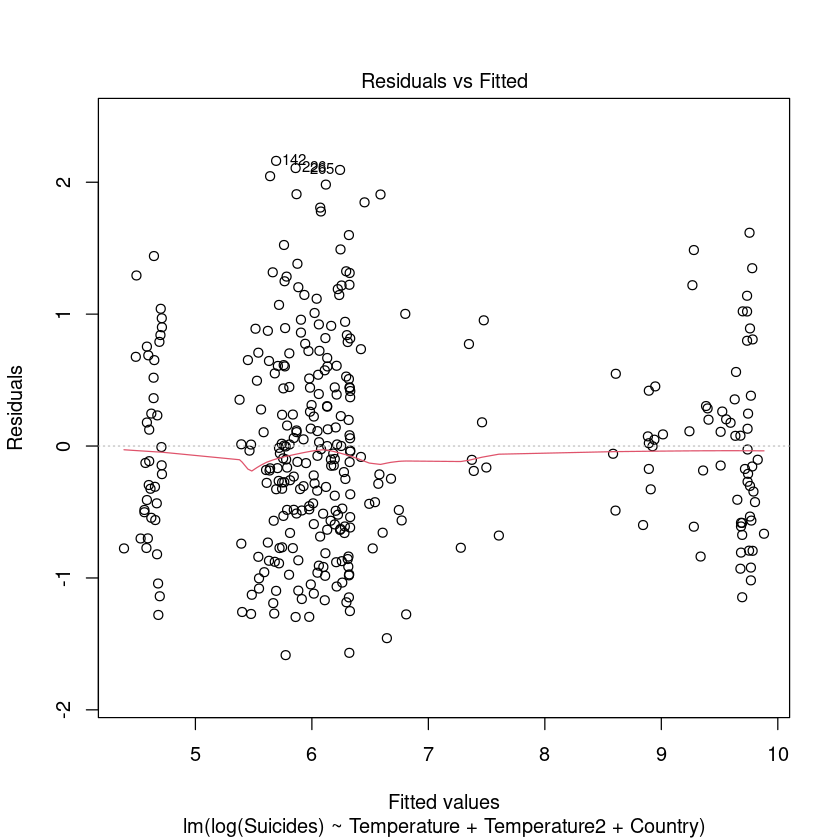

In [9]:
# 2. b) 
# Testons un modèle log normal QUADRATIQUE :
Mlognorm2  = lm(log(Suicides) ~ Temperature + Temperature2 + Country
            ,data = ToHot)
# same as
# Mnorm  = lm(log(Suicides) ~ Temperature + I(Temperature^2) + Country
#            ,data = ToHot)

plot(Mlognorm2 ,1)
plot( simulateResiduals(Mlognorm2) )

In [10]:
# 2. b) 
print(anova(Mlognorm2))

Analysis of Variance Table

Response: log(Suicides)
              Df Sum Sq Mean Sq  F value    Pr(>F)    
Temperature    1   6.19   6.187   9.9417 0.0017655 ** 
Temperature2   1   9.56   9.558  15.3571 0.0001084 ***
Country       11 799.87  72.715 116.8350 < 2.2e-16 ***
Residuals    327 203.52   0.622                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


2. c) </br>
Entre les 2 modèles, `Mlognorm` et `Mlognorm2`, lequel est le meilleur ? </br>
Autrement dit, le prédirait le mieux des données qu'il n'a jamais vu ? </br>
Ou encore, dans le cadre d'une [validation croisée](https://fr.wikipedia.org/wiki/Validation_crois%C3%A9e), lequel aurait le moins d'erreur de prédiction pour les données tests ? 

Le [Critère d'information d'Akaike](https://fr.wikipedia.org/wiki/Crit%C3%A8re_d%27information_d%27Akaike) (AIC) vise précisément à répondre à cette question.

In [11]:
# 2. c) 
AIC(Mlognorm , Mlognorm2)
diff(AIC(Mlognorm , Mlognorm2)[,2])

df AIC     
Mlognorm  14 822.4681
Mlognorm2 15 821.7154

[1] -0.7527872

Le modèle `Mlognorm2` est légèrement meilleur, mais cette différence est marginale. Nous nous concentrerons sur la forme quadratique dans la suite du TD.

> Petit aparté, si la transformation log n'avait pas fonctionné, nous aurions alors testé la transformation `boxcox` avec le code suivant :
```
### boxcox models ----
#' Start with the modèle with no transformation (`Mnorm`) and
#' compute the log likelihood for many values of lambda. This is implemented by the function `boxcox` from the `MASS` R package
bc <- MASS::boxcox(Mnorm,lambda=seq(-2,2,length=200))

# Select the best value of lambda
lambda = bc$x[which.max(bc$y)]

# Implement the transformation
z <- (ToHot$Suicides^lambda-1)/lambda

# Run the modèle on the transformed variable
Mboxcox_norm  = lm(z ~ Temperature + Temperature2 + Country ,   data = ToHot)

# Analyse the modèle as usually.
```

3a) Construisez un GLM Poisson analogue du modèle Mlognorm2 </br>
3b) Regardez la significativité i) des variables via des [tests de ratio de vraisemblance]() et ii) des coefficients </br>
3c) Bootstraper les coefficients
3c) Bootstraper les coefficients

In [12]:
###                  GLM Poisson ----- 
#'                     |                
#'                     |                 
#' ~~~~~~~~~~~~~~~~~~~~|~~~~~~~~~~~~~~~~~~~~~~~
#'                     |           
#'                     |           
#'                     |           
#'        ><(((°>      |      <°)))>< 
#'          ><(((°>    ¿    <°)))><  
#'        ><(((°>             <°)))>< 
#'                                           ><(((°>    
#'
#'
#'____;____(/_______§_______?___µ___\|/______\)_____

# 3a) 
Mpoisson = glm(Suicides ~ Temperature + Temperature2 + Country
            ,data = ToHot
            ,family = poisson(link = 'log')) # !!   <°)))><    !!

In [13]:
# 3b) i)significativité des variables via des tests de ratio de vraisemblance
# à la mano : 
# ajuster un modèle ne contenant pas la variable testée : 
#                                         _____________
Mpoisson_T2 = glm(Suicides ~ Temperature +               Country
             ,data = ToHot
             ,family = poisson(link = 'log')) # !!   <°)))><    !!

#' La vraisemblance de nos deux modèles : 
logLik(Mpoisson_T2)
logLik(Mpoisson)

stat_H0 = #'   -2log(  L(M_H0)/L(M_H1)  )    ~ chi²(p)
          #' = -2(log(L(M_H0)) - log(L(M_H1)  ))    ~ chi²(p)
          #' /!\  : les modèle doivent être nichés : M_H0 doit être un cas particulier de M_H1.
          #'      : Ici Mpoisson_T2 est un cas particulier de Mpoisson, où le coefficient associé à la variable Temperature2 est 0.
-2*(logLik(Mpoisson_T2) - logLik(Mpoisson))

pchisq(q = stat_H0, df = 1, lower.tail = F)

# Idem pour chaque variable

'log Lik.' -351293 (df=13)

'log Lik.' -350744.2 (df=14)

'log Lik.' 1.104217e-240 (df=13)

In [14]:
# 3b) i)
# à la "R, soit gentil s'il te plait" : 
print(anova(Mpoisson,test = 'LRT'))

Analysis of Deviance Table

Model: poisson, link: log

Response: Suicides

Terms added sequentially (first to last)


             Df Deviance Resid. Df Resid. Dev  Pr(>Chi)    
NULL                           340    3753771              
Temperature   1     5675       339    3748096 < 2.2e-16 ***
Temperature2  1   383158       338    3364939 < 2.2e-16 ***
Country      11  2666315       327     698624 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [15]:
print(anova(Mpoisson, Mpoisson_T2,test = 'LRT'))

Analysis of Deviance Table

Model 1: Suicides ~ Temperature + Temperature2 + Country
Model 2: Suicides ~ Temperature + Country
  Resid. Df Resid. Dev Df Deviance  Pr(>Chi)    
1       327     698624                          
2       328     699722 -1  -1097.6 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [16]:
# 3b) ii)significativité des coefficients
summary(Mpoisson)


Call:
glm(formula = Suicides ~ Temperature + Temperature2 + Country, 
    family = poisson(link = "log"), data = ToHot)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-130.79   -20.06    -9.58     5.40   337.96  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          5.948e+00  1.719e-02 345.967  < 2e-16 ***
Temperature          7.590e-02  2.044e-03  37.128  < 2e-16 ***
Temperature2        -2.160e-03  6.584e-05 -32.807  < 2e-16 ***
CountryCanada        5.408e-01  1.373e-02  39.374  < 2e-16 ***
CountryJapan         3.351e+00  1.202e-02 278.719  < 2e-16 ***
CountryPhilippines  -6.179e-01  3.067e-02 -20.148  < 2e-16 ***
CountrySouth Africa -1.724e+00  1.816e-02 -94.897  < 2e-16 ***
CountrySouth Korea   2.966e+00  1.265e-02 234.410  < 2e-16 ***
CountrySpain        -5.025e-01  1.364e-02 -36.826  < 2e-16 ***
CountrySwitzerland   1.100e+00  1.446e-02  76.059  < 2e-16 ***
CountryTaiwan        2.169e+00  1.302e-02 166.532  < 2e-1

In [17]:
# 3c) Bootstraper les coefficients (ça peut être un peu long à exécuter)
 MpoissonBoot = car::Boot(Mpoisson)

 MpoissonBoot = as.data.frame(confint(MpoissonBoot))

 MpoissonBoot$overlap_0 = apply(MpoissonBoot,1,prod) < 0
 MpoissonBoot

2.5 %       97.5 %      overlap_0
(Intercept)          3.49950475  8.95879463 FALSE    
Temperature         -0.32804823  0.40452335  TRUE    
Temperature2        -0.01198855  0.01081777  TRUE    
CountryCanada       -1.50291543  1.59008782  TRUE    
CountryJapan         2.20413703  4.40270673 FALSE    
CountryPhilippines  -1.84727285  0.37795145  TRUE    
CountrySouth Africa -2.80595968 -0.72156268 FALSE    
CountrySouth Korea   1.83554139  4.25524098 FALSE    
CountrySpain        -1.71158799  0.54636889  TRUE    
CountrySwitzerland  -0.30973396  2.13938632  TRUE    
CountryTaiwan        1.27871964  3.02244112 FALSE    
CountryUK            1.18119366  3.38237128 FALSE    
CountryUSA          -1.29202844  0.79273704  TRUE    
CountryVietnam      -1.41402626  0.72225426  TRUE

dispersion 
  11349.96

[1] 1

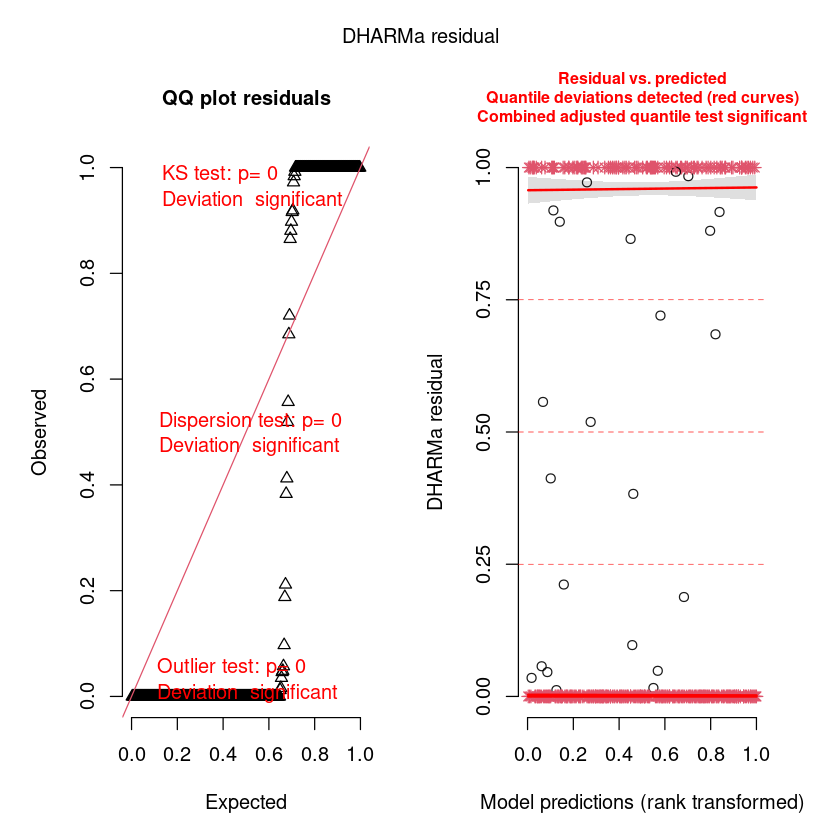

In [18]:
testDispersion(Mpoisson, plot = F)$statistic

summary(Mpoisson)$dispersion

plot( simulateResiduals(Mpoisson) )

=> Bullshit !

4. Testons différentes façons de prendre en compte la surdispersion </br>
   a) via un GLM quasiPossion </br>
   b) via un GLM negative binomial

In [19]:
# 4a)
### GLM quasipoisson -----
Mquasipoisson = glm(Suicides ~ Temperature + Temperature2 + Country
              ,data = ToHot, family = quasipoisson(link = 'log'))

In [20]:
plot( simulateResiduals(Mquasipoisson) )

ERROR: Error in simulate.lm(object, nsim = nsim, ...): family 'quasipoisson' not implemented


mais ceci aurait donné le même résultat que `plot( simulateResiduals(Mpoisson) )` car la méthode quasi ajuste seulement les *p*.values et les erreurs standard des coefficients.

In [ ]:
print(anova(Mquasipoisson, test = 'LRT'))


### <span style="color:red"> Terms added sequentially </span> ??!<a id='Terms_added_sequentially'></a>
[go to 'later'](#later)

In [ ]:
print(car::Anova(Mquasipoisson, test = 'LR',type='2'))
print(car::Anova(Mquasipoisson, test = 'LR',type='3'))

<span style="font-size: 30px"> <span style="color:red"> >>>> </span> [Un lien sur les décompositions de type I, II et III](https://md.psych.bio.uni-goettingen.de/mv/unit/lm_cat/lm_cat_unbal_ss_explained.html) <span style="color:red"> <<<< </span>
 </span>

In [ ]:
# 4a)
summary(Mquasipoisson)

In [ ]:
# 4b) ### GLM negative binomial -----

Mnb = MASS::glm.nb(Suicides ~ Temperature + Temperature2 + Country
                   ,data = ToHot)
testDispersion(Mnb, plot=F)
plot( simulateResiduals(Mnb) )

In [ ]:
print(car::Anova(Mnb, test = 'LR',type='2'))
summary(Mnb)

Nous avons donc 2 modèles qui sont censés gérer correctement la surdispersion, mais qui sont en complet désaccord sur l'effet de la température…

Solutions :
* ~On choisit le modèle qui nous arrange.~ (un exemple de P-hacking ([1](https://en.wikipedia.org/wiki/Data_dredging) et [2](https://doi.org/10.1186/s12903-016-0208-x)) très très classique… ; aussi appelé 'data-
* ~On compare l'AIC~ : cela reviendrait à comparer une vraisemblance et une quasi-vraisemblance
* Réaliser une réelle [validation croisée](https://cran.r-project.org/web/packages/cv/vignettes/cv.html)…
* **Comparer la relation moyenne-variance suposée par les modèles à la relation observée (empirique)**

In [ ]:
# Empirical mean - variance relationship :
Yhat = predict(Mlognorm2)
Q = quantile(Yhat, seq(0,1,length = round(nrow(ToHot)/3)))
ToHot$grp = 1
for(q in Q[-1]){
  ToHot$grp[Yhat > q] = max(ToHot$grp)+1
}
boxplot(Suicides ~ grp, data = ToHot,log="y")


In [ ]:

table(ToHot$grp)
EmpiricalMean_Variance = as.data.frame(t(sapply(unique(ToHot$grp), function(g){
  w=which(ToHot$grp==g)
  c('mean' = mean(ToHot$Suicides[w]), 'var' = var(ToHot$Suicides[w]))
  })))
head(EmpiricalMean_Variance)
plot(EmpiricalMean_Variance)
plot(EmpiricalMean_Variance,log='xy')


In [ ]:
plot(EmpiricalMean_Variance,log='xy')
Mnb$theta # https://stats.stackexchange.com/questions/460040/what-is-theta-in-negative-binomial-distribution
µ   = seq(min(EmpiricalMean_Variance$mean,na.rm = T), max(EmpiricalMean_Variance$mean,na.rm = T), length = 10000)
# points(log(µ),log(Var),type='l')
abline(0,1, lwd = 1.5) # poisson
# points(µ , µ*testDispersion(Mpoisson, plot = F)$statistic , type ='l', col='darkgreen', lwd = 1.5) # quasipoisson
points(µ , µ*testDispersion(Mpoisson, plot = F,type = 'PearsonChisq')$statistic , type ='l', col='darkgreen', lwd = 1.5) # quasipoisson
points(µ , µ+(µ^2)/Mnb$theta , type='l', col='darkred', lwd = 1.5) # negative binomial
legend(x = 'topleft',legend = c("Poisson (var = mean)"
                               ,"Quasi-Poisson (var = mean x Dispersion)"
                               ,"Negative binomial (var = mean+(mean^2)/theta)"), col=c('black', "darkgreen", "darkred"), text.col = c('black', "darkgreen", "darkred"), lwd = 1.5)

$\Rightarrow$ **Pour ce jeu de donnée** le modèle négative binomial est bien meilleur. </br>
(Pour plus d'information sur ces 2 types de modèles, voir [lien](https://www.utstat.utoronto.ca/reid/sta2201s/QUASI-POISSON.pdf)) </br>
Visualisons les prédictions du modèle :

In [ ]:
ToHot$Predictions = predict(Mnb, type='respons')

ggplot(ToHot,aes(y = Suicides, x = Temperature, color=Country, shape=Country)) + 
  geom_point() + 
  scale_y_log10(limits = ylim) +
  scale_shape_manual(values = rep(1:6, len = 12)) + 
  geom_line(aes(y=Predictions))

